# Αποθήκες και εξόρυξη δεδομένων

 Το έργο του στοχεύει στη χρήση σύγχρονων και αποτελεσματικών τεχνικών όπως τον αλγόριθμο KNN που ομαδοποιεί το σύνολο δεδομένων και παρέχει την ολοκληρωμένη και γενική προσέγγιση για τη σύσταση κρασιού στους πελάτες βάσει ορισμένων χαρακτηριστικών. Αυτό θα βοηθήσει τους ιδιοκτήτες των καταστημάτων να γνωρίζουν ήδη για τη ζήτηση του κρασιού και κατά συνέπεια το απόθεμα θα ενημερωθεί. Αυτό θα διευκολύνει την αύξηση του κέρδους των ιδιοκτητών καταστημάτων. 



In [104]:
import pickle
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans

In [105]:
data=pd.read_csv('/Users/paolomarco/Downloads/wine_data.csv');#Κανουμε import το dataset


In [106]:
data.describe()# μας δίνει κάποια γενικά στατιστικά του dataset

,customer_seg,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [107]:
data.head()# εμφανίζει τα πρώτα rows του dataset 

,customer_seg,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Preprocessing των δεδομένων 
* normalization
* Split τα δεδομένα 
* scalling

In [108]:
from sklearn.model_selection import train_test_split


In [109]:
X = data.iloc[:, 1:13].values
y = data.iloc[:, 0].values
print(X)
print(y)
X= (X - np.min(X)) / (np.max(X) - np.min(X))
print(X)

[[14.23  1.71  2.43 ...  5.64  1.04  3.92]
 [13.2   1.78  2.14 ...  4.38  1.05  3.4 ]
 [13.16  2.36  2.67 ...  5.68  1.03  3.17]
 ...
 [13.27  4.28  2.26 ... 10.2   0.59  1.56]
 [13.17  2.59  2.37 ...  9.3   0.6   1.62]
 [14.13  4.1   2.74 ...  9.2   0.61  1.6 ]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[[0.08710694 0.00976092 0.01420893 ... 0.03403966 0.0056218  0.02341385]
 [0.08074381 0.01019337 0.01241737 ... 0.02625564 0.00568357 0.0202014 ]
 [0.08049669 0.01377649 0.0156916  ... 0.03428677 0.00556002 0.0187805 ]
 ...
 [0.08117625 0.02563786 0.01315871 ... 0.06221042 0.00284179 0.00883425]
 [0.08055847 0.01519738 0.01383827 ... 0.0566504  0.00290356 0.00920492]
 [0.

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [111]:
from sklearn.preprocessing import StandardScaler #κάνουμε scale τα δεδομένα 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ΚΝΝ algorithm (nearest-neighbor)


In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn = []
for i in range(1,21):
            
    classifier = KNeighborsClassifier(n_neighbors=i)
    trained_model=classifier.fit(X_train,y_train)
    trained_model.fit(X_train,y_train )
    
    # Πρόβλεψη  των Test  results
    
    y_pred = classifier.predict(X_test)
    
    # Δημιουργία Confusion Matrix
    
    from sklearn.metrics import confusion_matrix
    
    cmat_KNN = confusion_matrix(y_test, y_pred)
    print(i)
    print(cmat_KNN)
    print("Accuracy train score for algorithm  KNN",accuracy_score(y_train, trained_model.predict(X_train))*100)
    
    
    print("Accuracy test score for algorithm  KNN ",accuracy_score(y_test, y_pred)*100)
   
    knn.append(accuracy_score(y_test, y_pred)*100)
    print(classification_report(y_test, y_pred))
    
  

1
[[19  0  0]
 [ 2 19  1]
 [ 0  0 13]]
Accuracy train score for algorithm  KNN 100.0
Accuracy test score for algorithm  KNN  94.44444444444444
              precision    recall  f1-score   support

           1       0.90      1.00      0.95        19
           2       1.00      0.86      0.93        22
           3       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54

2
[[19  0  0]
 [ 6 16  0]
 [ 0  0 13]]
Accuracy train score for algorithm  KNN 95.16129032258065
Accuracy test score for algorithm  KNN  88.88888888888889
              precision    recall  f1-score   support

           1       0.76      1.00      0.86        19
           2       1.00      0.73      0.84        22
           3       1.00      1.00      1.00        13

    accuracy                           0.89        54
   macro avg       0.92      0.91      0.90      

Text(0, 0.5, 'Accuracy')

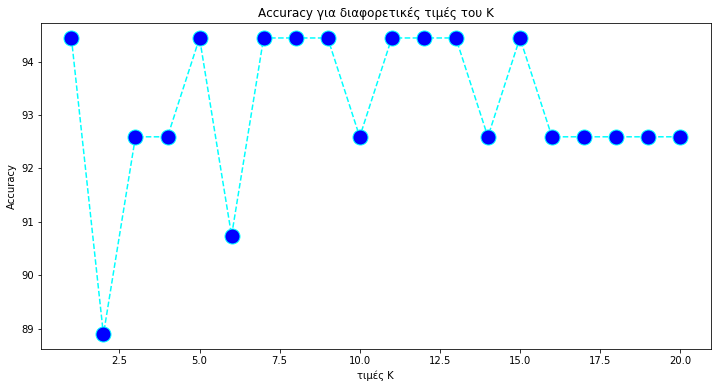

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 21),knn, color='cyan', linestyle='dashed', marker='o',  
             markerfacecolor='blue', markersize=15)
plt.title('Accuracy για διαφορετικές τιμές του Κ')  
plt.xlabel('τιμές K')  
plt.ylabel('Accuracy') 



# SUPORT VECTOR MACHINE ALGORITHM

In [114]:
# εφαρμογη SVM στο Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
trained_model=classifier.fit(X_train,y_train)
trained_model.fit(X_train,y_train )


# Πρόβλεψη  των Test  results
y_pred = classifier.predict(X_test)

#  Δημιουργεία Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_SVM = confusion_matrix(y_test, y_pred)
print(cm_SVM)
print("Accuracy train train score for  SVM algorithm",accuracy_score(y_train, trained_model.predict(X_train))*100)

print("Accuracy test score for  SVM algorithm",accuracy_score(y_test, y_pred)*100)


[[19  0  0]
 [ 1 21  0]
 [ 0  0 13]]
Accuracy train train score for  SVM algorithm 99.19354838709677
Accuracy test score for  SVM algorithm 98.14814814814815


# Random Forest

In [115]:
from sklearn.ensemble import RandomForestRegressor
# Δινουμε ως ορισμα  1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train το μοντέλο 
rf.fit(X_train, y_train);

In [116]:
# Πρόβλεψη  των Test  results
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.09


In [117]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Υπολογισμός accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 20), '%.')


Accuracy: 95.30216049382716 %.
